# Test 2b - Merge, Aggregate, Visualize

## Introduction

This problem tests your ability to merge, aggregate, and visualize data.
You'll work with realistic business data to answer questions about product profitability.

Before submitting, ensure your notebook:

- Includes your verification info (Banner ID and code) as the first cell
- Runs completely with "Kernel → Restart & Run All"
- Shows your work (don't just print final answers)
- Includes your interpretation responses at the end

## Dataset: Bean & Brew Coffee Shop

You've been hired to analyze sales data for Bean & Brew, a local coffee shop chain with three locations. The owner wants to understand which products are most profitable and how profitability varies across locations.

There are two data files:

- `sales.csv` - Individual transaction records
  - `transaction_id`: Unique transaction identifier
  - `timestamp`: Date and time of purchase (format: 'YYYY-MM-DD HH:MM:SS')
  - `location`: Store location ('Downtown', 'Campus', 'Suburb')
  - `product_id`: Product identifier (links to products table)
  - `quantity`: Number of units sold
  - `revenue`: Total revenue from transaction
  - `payment_method`: Payment type ('Cash', 'Credit', 'Mobile')
  - `loyalty_member`: Boolean indicating if customer is loyalty program member
- `products.csv` - Product catalog
  - `product_id`: Unique product identifier
  - `name`: Product name
  - `category`: Product category ('Coffee', 'Tea', 'Pastry', 'Sandwich')
  - `cost`: Cost to make/acquire one unit (for profit calculation)

The dataset contains two weeks of sales data (approximately 3,000 transactions) across 18 products. It includes both regular and premium items in each category.

We are interested in learning which product categories generate the most profit, and how does profitability vary across locations? Complete the following tasks to answer those questions and more.

## Scoring

Total: 30 points (+ 5 bonus)

- Tasks 1-6: 18 points
- Interpretation (Questions 1-4): 12 points
- Bonus: 5 points (optional)

## Generate Your Dataset

Before starting the analysis, you need to generate your unique dataset using your Banner ID.

1. Open a terminal in the folder containing `generate_test2b_data.py`
2. Activate your conda virtual environment
3. Run: `python generate_test2b_data.py`
4. Enter your 9-digit Banner ID when prompted (you'll enter it twice to confirm)

The script will create two files in the `data/` folder:

- `data/products.csv` - Product catalog
- `data/sales.csv` - Transaction records

Important: At the end, the script displays a verification block like this:

```
======================================================================
DATA VERIFICATION INFORMATION
======================================================================
banner id:          904123456
verification code:  5e0dXXXXXXXX
======================================================================
```

Copy the banner id and verification code lines and paste them into the cell below. This is required for submission.

banner id:          904123456  
verification code:  5e0dcb416f37

## Setup: Load the Data

Run the cell below to load the data. The code is provided for you.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (provided)
sales = pd.read_csv('data/sales.csv', parse_dates=['timestamp'])
products = pd.read_csv('data/products.csv')

print(f"Sales: {len(sales)} transactions")
print(f"Products: {len(products)} items in catalog")
print()
print("Sales preview:")
sales.head()

Sales: 2714 transactions
Products: 18 items in catalog

Sales preview:


,transaction_id,timestamp,location,product_id,quantity,revenue,payment_method,loyalty_member
0,1001,2025-11-10 06:26:00,Suburb,112,1.0,3.08,Credit,True
1,1003,2025-11-10 06:32:00,Downtown,104,1.0,2.63,Credit,False
2,1000,2025-11-10 06:42:00,Campus,105,1.0,3.10,Credit,True
3,1002,2025-11-10 06:49:00,Campus,104,1.0,2.31,Mobile,False
4,1016,2025-11-10 07:04:00,Campus,106,1.0,7.50,Mobile,False


In [2]:
# Products catalog
products

,product_id,name,category,cost
0,101,Espresso,Coffee,1.2
1,102,Cappuccino,Coffee,1.8
2,103,Latte,Coffee,1.9
3,104,Americano,Coffee,1.0
4,105,Cold Brew,Coffee,1.5
5,106,Nitro Cold Brew,Coffee,2.5
6,107,Green Tea,Tea,0.8
7,108,Chai Latte,Tea,1.2
8,109,Herbal Tea,Tea,0.7
9,110,Premium Matcha,Tea,2.2


## Task 1: Data Quality Check

Investigate the sales data quality and coverage. Your code should answer the following questions:

1. How many missing values are in each column?
2. How many unique product IDs appear in the sales data? Compare this to the catalog size.
3. What is the date range (earliest and latest transaction)?

### Your Code

In [3]:
# Task 1: use isna(), nunique(), min/max on timestamp

print('The numbers of missing values in the sales dataset are as follows:\n')
print(sales.isna().sum())

print('\nThe numbers of missing values in the products dataset are as follows:\n')
print(products.isna().sum())

print(f"\nThe number of unique product IDs in the sales dataset is: {sales['product_id'].nunique()}")
      
print(f"\nThe number of unique product IDs in the products dataset is: {products['product_id'].nunique()}")

print(f"\nThe difference is {sales['product_id'].nunique() - products['product_id'].nunique()} (there are {sales['product_id'].nunique() - products['product_id'].nunique()} product IDs in sales that are not in the catalog)")
 
print(f"\nThe date range = {sales['timestamp'].max()-sales['timestamp'].min()}, with the earliest on {sales['timestamp'].min()}, and the latest on {sales['timestamp'].max()}")


The numbers of missing values in the sales dataset are as follows:

transaction_id    0
timestamp         0
location          0
product_id        0
quantity          6
revenue           5
payment_method    0
loyalty_member    0
dtype: int64

The numbers of missing values in the products dataset are as follows:

product_id    0
name          0
category      0
cost          0
dtype: int64

The number of unique product IDs in the sales dataset is: 21

The number of unique product IDs in the products dataset is: 18

The difference is 3 (there are 3 product IDs in sales that are not in the catalog)

The date range = 13 days 14:39:00, with the earliest on 2025-11-10 06:26:00, and the latest on 2025-11-23 21:05:00


## Task 2: Merge Sales with Products

Merge the sales and products DataFrames to add product information (name, category, cost) to each transaction.

### Your Code

In [4]:
# Task 2: use pd.merge() with appropriate join type

merged = pd.merge(sales, products, on="product_id", how='left')

merged.head()

,transaction_id,timestamp,location,product_id,quantity,revenue,payment_method,loyalty_member,name,category,cost
0,1001,2025-11-10 06:26:00,Suburb,112,1.0,3.08,Credit,True,Muffin,Pastry,0.9
1,1003,2025-11-10 06:32:00,Downtown,104,1.0,2.63,Credit,False,Americano,Coffee,1.0
2,1000,2025-11-10 06:42:00,Campus,105,1.0,3.10,Credit,True,Cold Brew,Coffee,1.5
3,1002,2025-11-10 06:49:00,Campus,104,1.0,2.31,Mobile,False,Americano,Coffee,1.0
4,1016,2025-11-10 07:04:00,Campus,106,1.0,7.50,Mobile,False,Nitro Cold Brew,Coffee,2.5


## Task 3: Verify the Merge

After merging, verify that the merge worked correctly:

1. Compare the shape of the merged DataFrame to the original sales data
2. Check if any rows have missing values in the product columns (name, category, cost)
3. If there are missing values, identify which product_id(s) are causing the problem

### Your Code

In [5]:
# Task 3: check shape, isna() on product columns, filter to find problem IDs

print(f"The shape of the merged DataFrame is {merged.shape} while the shape of the original sales data is {sales.shape}")

print(f"\nThe numbers of missing values in the product columns are:\n{merged[['name', 'category', 'cost']].isna().sum()}")

print(f"\nThe product_ids causing the missing values problem are: {merged[(merged['name'].isna()) | (merged['category'].isna()) | (merged['cost'].isna())]['product_id'].unique()}")


The shape of the merged DataFrame is (2714, 11) while the shape of the original sales data is (2714, 8)

The numbers of missing values in the product columns are:
name        15
category    15
cost        15
dtype: int64

The product_ids causing the missing values problem are: [200 201 199]


## Task 4: Profit by Category

First, calculate profit for each transaction: `profit = revenue - (cost × quantity)`

Then summarize profitability by product category. Your code should return a table that shows both total profit and number of transactions for each category. Sort it by total profit (highest first).

### Your Code

In [6]:
# Task 4: create profit column, then groupby with .agg()

'''
Before proceeding with the calculations, I will clean the merged dataset by removing
all rows that contain missing values. This step eliminates:

• the 15 rows where the product information (name, category, cost) is missing due
  to unmatched product_id values, and
• the 11 rows in the sales data where either quantity or revenue is missing.

Removing these incomplete rows ensures that the profit calculation and all
subsequent aggregations are based only on valid, fully specified transactions.
'''
merged = merged.dropna()
print(f"Cleaned merged dataset: {len(merged)} rows remaining after dropping 26 rows with missing product info, quantity, or revenue.\n")

merged['profit'] = merged['revenue'] - merged['cost'] * merged['quantity']

profitability = merged.groupby('category').agg(total_profit=('profit','sum'), total_transactions=('profit','count')).sort_values('total_profit', ascending=False)

profitability

Cleaned merged dataset: 2688 rows remaining after dropping 26 rows with missing product info, quantity, or revenue.



,total_profit,total_transactions
category,,
Sandwich,4100.12,584
Coffee,2284.71,958
Pastry,1564.16,545
Tea,860.61,601


## Task 5: Profit by Category and Location

Analyze how profitability varies by both category and location. Your code should produce a table that shows the following for every combination of category and location:

- Total profit
- Average profit per transaction
- Number of transactions

Display the results as a flat table (i.e., without a nested/hierarchical index).

### Your Code

In [7]:
# Task 5: groupby multiple columns, .agg() with dict, reset_index()

location_profit = merged.groupby(['category','location']).agg(total_profit=('profit','sum'), avg_transaction_profit=('profit','mean'), no_of_transactions=('profit', 'count')).reset_index()

location_profit

,category,location,total_profit,avg_transaction_profit,no_of_transactions
0,Coffee,Campus,1101.10,1.987545,554
1,Coffee,Downtown,978.68,3.011323,325
2,Coffee,Suburb,204.93,2.594051,79
3,Pastry,Campus,623.09,2.482430,251
4,Pastry,Downtown,605.31,3.498902,173
5,Pastry,Suburb,335.76,2.774876,121
6,Sandwich,Campus,702.94,5.206963,135
7,Sandwich,Downtown,2680.97,7.908466,339
8,Sandwich,Suburb,716.21,6.511000,110
9,Tea,Campus,201.53,1.119611,180


## Task 6: Visualize Category Profitability

Create a bar chart showing total profit by product category. Use seaborn and ensure that the result:

- Has clearly labeled categories
- Includes a descriptive title
- Makes it clear which category is most/least profitable

### Your Code

Text(0, 0.5, 'Total profit')

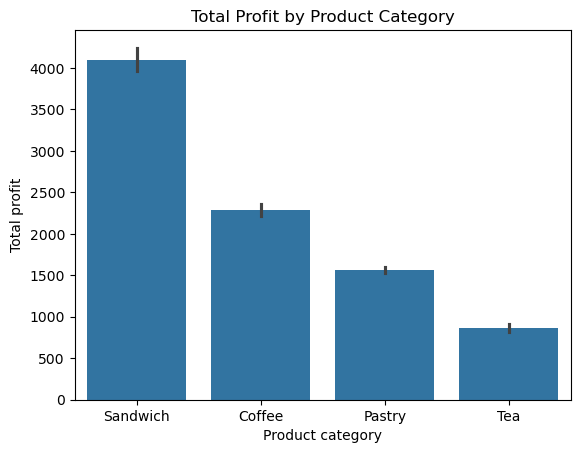

In [8]:
# Task 6: use sns.barplot() with aggregated data

sns.barplot(
    data=merged,
    x='category',
    y='profit',
    estimator='sum',
    order=profitability.index
)

plt.title('Total Profit by Product Category')
plt.xlabel('Product category')
plt.ylabel('Total profit')


## Interpretation

Concisely answer the following questions based on your analysis.


1. What might go wrong if you did not verify the merge in Task 3 before proceeding with the analysis?
2. In Tasks 4 and 5, you aggregated data at different levels of detail (by category, then by category and location). How did this change what you could learn from the data?
3. Reflect on the patterns you discovered in your analysis. What valuable insights did your work generate?
4. The coffee shop owner asks: "Based on your analysis, what's the single most important thing I should do to improve profitability?" Provide a specific, actionable recommendation. Justify your recommendation with evidence from your analysis (include specific numbers from your results). Also, suggest additional analysis that you feel might be worthwhile.

### Your Answers

1. When I verified the merge in Task 3, I discovered that the merged dataset contained 26 problematic rows: 15 rows with missing product information (because their product_id does not appear in the catalog) and 11 rows with missing quantity or revenue from the original sales data. After identifying these issues, I cleaned the dataset by dropping all rows that contained any missing values before calculating profit. This ensured that all subsequent profit calculations and groupby aggregations were based on a clean and fully complete dataset of 2,688 valid transactions. If I had not verified the merge, I would not have noticed these missing values and would not have removed the affected rows. In that case, the incomplete rows would remain in the dataset and enter later steps. Because the missing values occur in critical fields such as category, cost, revenue, or quantity, these rows would cause inconsistencies in the analysis. Although they would be excluded silently during groupby operations (because they lack a valid category or valid profit value), keeping them would distort the apparent dataset size, making it seem as if all 2,714 transactions were used even though only 2,688 would actually contribute to the results.
   
2. In Task 4, aggregating by category only gave a high-level summary of the menu and showed which product categories are most profitable overall, without worrying about where the sales came from. This is useful for big-picture decisions like which categories matter most to the business. In Task 5, aggregating by both category and location added a second dimension and showed how the same categories perform differently across stores. This finer level of detail makes it possible to spot location-specific strengths and weaknesses and to think about targeted actions for particular stores, rather than treating all locations as if they behave the same.

3. Using the cleaned dataset of 2,688 transactions, I found that sandwiches are the main profit driver with a total profit of about 4,100, followed by coffee (about 2,285), pastries (about 1,565), and tea (about 861). When broken down by location, sandwich profit is heavily concentrated at the Downtown store (about 2,680), while Campus and Suburb each contribute only around 700. Coffee profit shows a similar pattern: Campus (about 1,101) and Downtown (about 979) account for almost all coffee profit, while the Suburb store contributes only about 205. Pastry profit is more balanced across locations but is still higher at Campus and Downtown than at Suburb. Overall, the analysis suggests that the business relies heavily on sandwiches (especially Downtown) and that the Suburb location underperforms across several categories, indicating clear opportunities for improvement there.

4. Based on my analysis, the most important action is to improve coffee performance at the Suburb location. Coffee generates about 2,285 in total profit across all stores, but the Suburb store contributes only about 205, which is roughly 9 percent of total coffee profit. Since coffee is the second most profitable category overall, improving its performance in Suburb through targeted promotions, better visibility, or adjusting the coffee menu would have the biggest impact on overall profitability. For further analysis, it would be useful to compare profit by store to see how each location performs overall and to examine sales by time of day using the timestamp column to identify peak hours for each store. This would help design more effective, time-targeted coffee promotions at the Suburb location.

## Bonus: Time-Based Analysis (Optional)

For extra credit, investigate a time-based question of your choosing. Examples of questions you could explore include:

- Do sales patterns differ between weekdays and weekends?
- Which hours are busiest at each location?
- Is there a day of the week that stands out for profitability?

For full credit you must:

- State your question clearly
- Show your analysis code
- Summarize what you found in 2-3 sentences

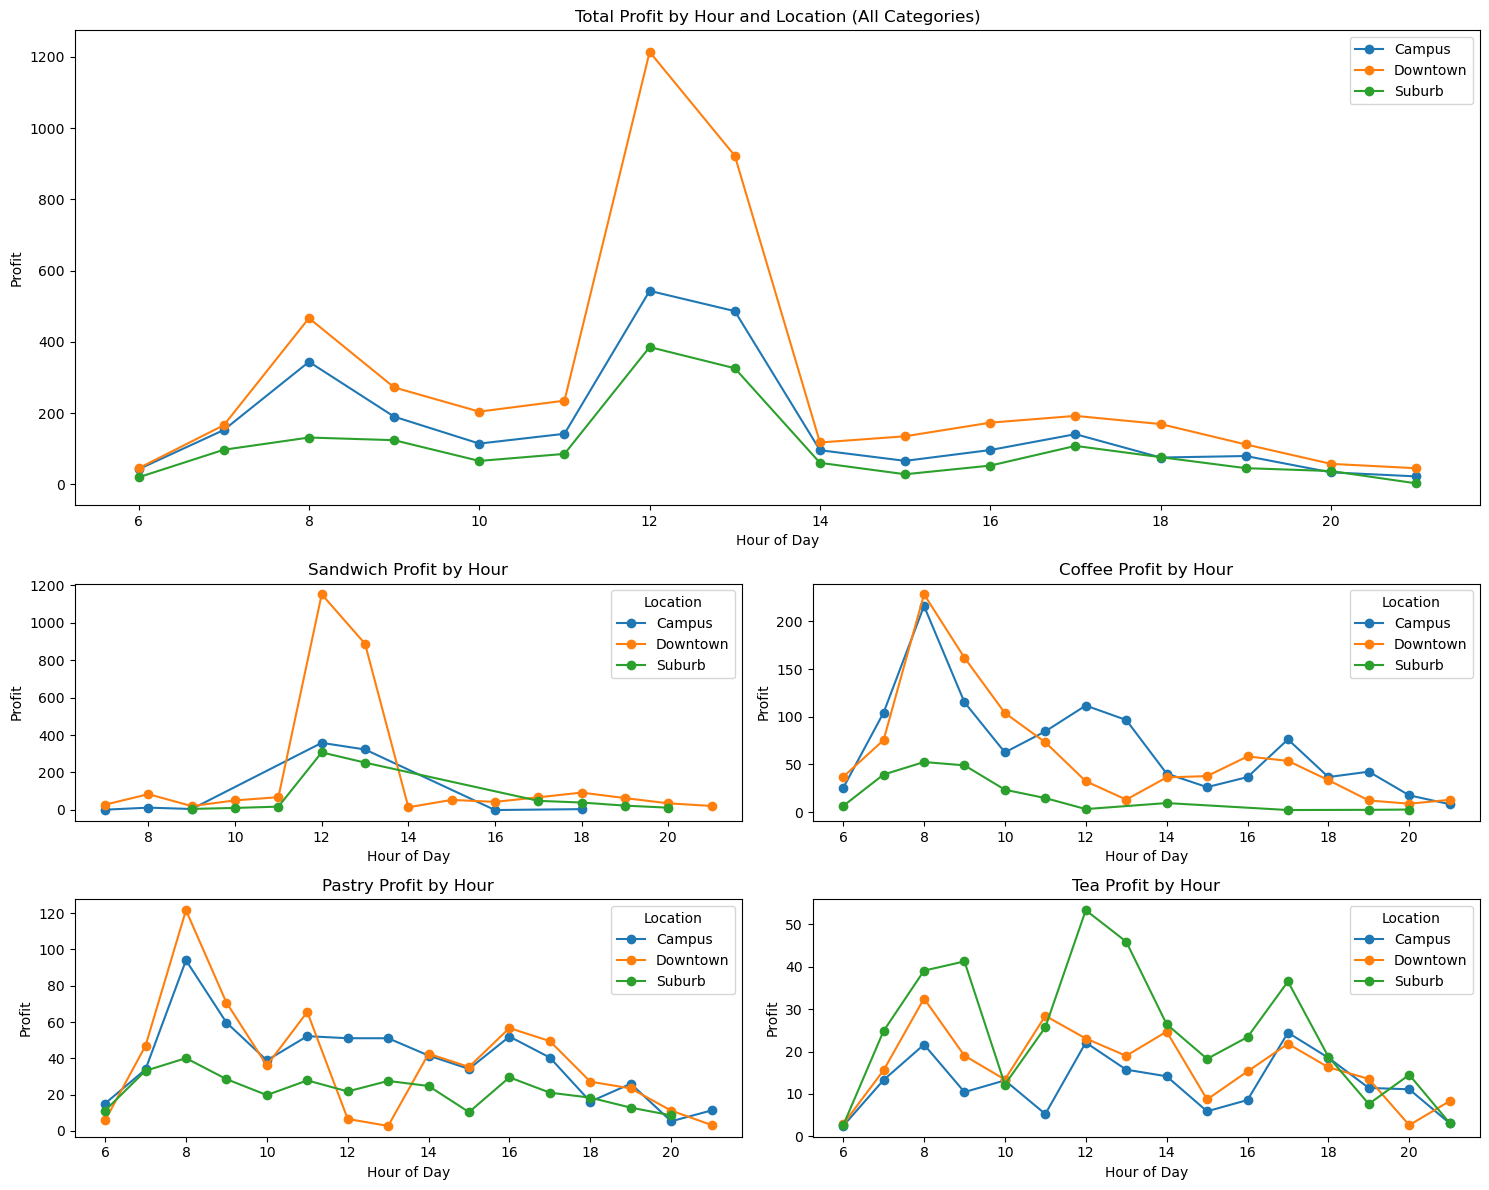

In [22]:
# Bonus: Your time-based analysis here

merged['hour']=merged['timestamp'].dt.hour
hourly_location_sales=merged.groupby(['location','hour'])['profit'].sum().reset_index()

cat_hour = (
    merged.groupby(['category', 'location', 'hour'])['profit']
          .sum()
          .reset_index()
)

categories = ['Sandwich', 'Coffee', 'Pastry', 'Tea']

fig = plt.figure(figsize=(15, 12))
gs = fig.add_gridspec(3, 2, height_ratios=[2, 1, 1])  # top plot is bigger

ax_big = fig.add_subplot(gs[0, :])   

for loc, sub in hourly_location_sales.groupby('location'):
    ax_big.plot(sub['hour'], sub['profit'], marker='o', label=loc)

ax_big.set_title('Total Profit by Hour and Location (All Categories)')
ax_big.set_xlabel('Hour of Day')
ax_big.set_ylabel('Profit')
ax_big.legend()


axes_small = [
    fig.add_subplot(gs[1, 0]),
    fig.add_subplot(gs[1, 1]),
    fig.add_subplot(gs[2, 0]),
    fig.add_subplot(gs[2, 1])
]

for ax, cat in zip(axes_small, categories):
    sub_cat = cat_hour[cat_hour['category'] == cat]
    
    for loc, sub in sub_cat.groupby('location'):
        ax.plot(sub['hour'], sub['profit'], marker='o', label=loc)

    ax.set_title(f'{cat} Profit by Hour')
    ax.set_xlabel('Hour of Day')
    ax.set_ylabel('Profit')
    ax.legend(title='Location')

plt.tight_layout()
plt.show()

### Your Findings

*Bonus findings here (state your question and what you discovered)*

The question I investigated is: Which hours of the day generate the most profit at each location, overall and by product category?

Across all categories, all locations peak sharply around 12:00 p.m., with Downtown producing the highest midday profit and Campus the second highest. Coffee shows a strong morning peak (7–9 a.m.) driven mostly by Downtown, while sandwiches dominate the lunch-time spike across the board. An interesting exception is Tea, where the Suburb location outperforms the other stores at several hours—suggesting a different customer preference or stronger tea offering there. This advantage can be used strategically by promoting tea-pastry bundles in Suburb and applying Suburb’s successful tea practices (menu, pricing, staff recommendations) to Campus and Downtown to lift tea performance across all locations.

## Submission

Ensure your notebook:

- Has the verification block (Banner ID and code) as the first cell
- Runs completely from top to bottom without errors
- Shows all task outputs clearly
- Includes all interpretation responses
- Is saved and committed to your repository

Follow the submission instructions on Canvas to submit your work.